### Questions I asked myself:

What is the best Accuracy Score I can achieve predicting heart disease in patients by classification using a tree model?
What are the the traits most commonly found among heart disease patients?

### Imports and Initial Data Exploration.

In [1]:
# importing packages
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from category_encoders import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from pandas_profiling import ProfileReport


In [2]:

# importing pandas dataframe and checking columns for my prediction target
df = pd.read_csv('heart.csv')
print(df.columns)
df.head()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Cleaning Stage

In [4]:
# defining my target and checking for null/nan values
df.isnull().sum()
# under the assumption that there are no null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# dropping a duplicate row pointed out in the profile report.
df = df.drop_duplicates()

### Splitting Dataset Into Train, Validation, and Test Sets.

In [6]:
# splitting the data into train, val, and test
train, val = train_test_split(df, random_state=30)
train, test = train_test_split(train, random_state=55)

In [7]:
# splitting vy variables to prepare for creating a blaseline and inevitably my classification
# dropping the 'target' column, aka true/false to heart disease classification
target = 'target'
x_train = train.drop(columns=['target'])
y_train = train[target]
x_val = val.drop(columns=['target'])
y_val = val[target]
x_test = test.drop(columns=['target'])
y_test = test[target]

### Importing a Dummy Classifier for Classifier baseline.

In [8]:
# importing dummy classifier to predict the mean value of target by predicting uniformly at random.
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(x_train, y_train)

DummyClassifier(random_state=1, strategy='uniform')

In [9]:
# simple baseline score using a dummy classifier
dummy.score(x_val, y_val)

0.5789473684210527

### Fitting base DecisionTree Classifier 

In [10]:
model = DecisionTreeClassifier(random_state=55)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=55)

In [11]:
print(model.score(x_train, y_train))
print(model.score(x_val, y_val))

1.0
0.7105263157894737


### Fitting base Random Forest Classifier

In [12]:
# fitting a model with Randomforrest
model = RandomForestClassifier(random_state=55)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=55)

In [13]:
print(model.score(x_train, y_train))
print(model.score(x_val, y_val))

1.0
0.7894736842105263


### Plotting Feature Importances for the top 13 features in my x_test set.

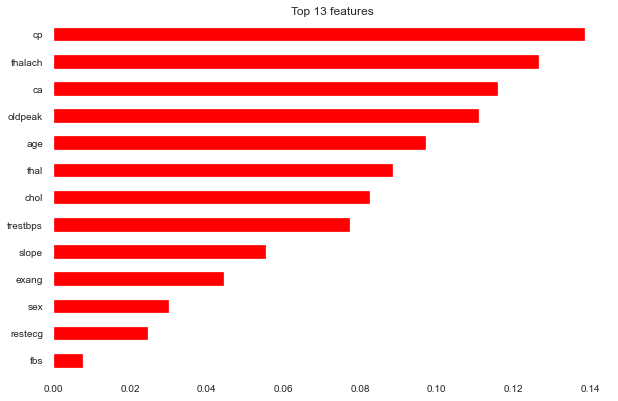

In [14]:
### Get feature importances
rf = model
importances = pd.Series(rf.feature_importances_, x_val.columns)

### Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 13
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='red');

looking at the permutation importances of my RandomForestClassifier

In [15]:
# importing eli5 PermutationImportance
import eli5 
from eli5.sklearn import PermutationImportance

C:\Users\Toshu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Toshu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [16]:
permuter = PermutationImportance(
    model, 
    scoring = 'accuracy',
    n_iter=5, 
    random_state=35
)
permuter.fit(x_val, y_val)

PermutationImportance(estimator=RandomForestClassifier(random_state=55),
                      random_state=35, scoring='accuracy')

In [17]:
feature_names=x_val.columns.tolist()
pd.Series(permuter.feature_importances_,feature_names)

age         0.000000e+00
sex         5.526316e-02
cp          2.631579e-02
trestbps    7.894737e-03
chol        2.220446e-17
fbs         0.000000e+00
restecg    -7.894737e-03
thalach    -2.631579e-03
exang       5.263158e-03
oldpeak     2.368421e-02
slope       3.684211e-02
ca          5.263158e-03
thal        3.684211e-02
dtype: float64

In [18]:
eli5.show_weights(
    permuter, 
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.0553 ± 0.0307,sex
0.0368 ± 0.0387,thal
0.0368 ± 0.0349,slope
0.0263 ± 0.0166,cp
0.0237 ± 0.0387,oldpeak
0.0079 ± 0.0211,trestbps
0.0053 ± 0.0516,ca
0.0053 ± 0.0129,exang
0.0000 ± 0.0288,chol
0 ± 0.0000,fbs


Ordinary Least Squares Line

In [37]:
'''importing plotly and creating a least-squared regression line for the cholesterol
    and resting beats per second c'''
import plotly.express as px
px.scatter(data_frame=df,x='trestbps', y='chol', trendline='ols' )

### Density Heatmap of Age and Sex

In [20]:
px.density_heatmap(data_frame=df, x='age', y='sex' )

### Creating a 2 Feature Dependency Plot For Top Feature Importances
(Maximum Heart Rate Achieved)

In [21]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [22]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [23]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
features = ['thalach', 'cp']
interaction = pdp_interact(model,
    x_val,
    model_features=x_val.columns,
    features=features)

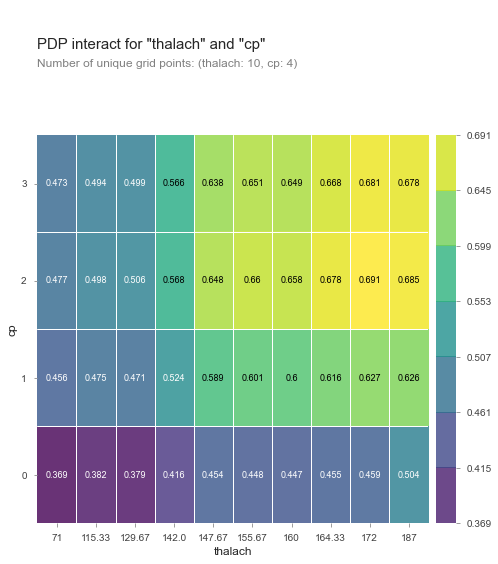

In [24]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

Creating Single Variable Partial Dependency Plots

In [25]:
from pdpbox.pdp import pdp_isolate, pdp_plot

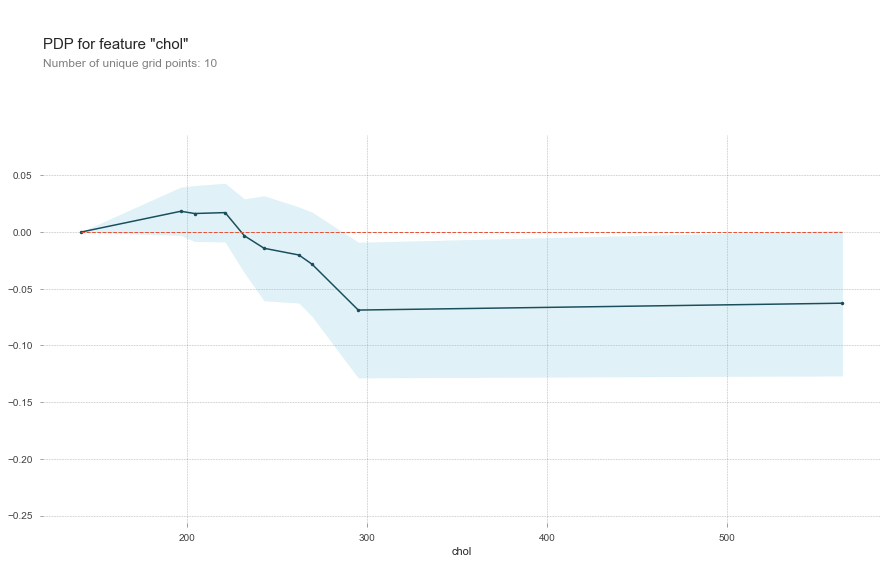

In [26]:
feature = 'chol'

isolated = pdp_isolate(
    model=model,
    dataset=x_val,
    model_features=x_val.columns,
    feature=feature)
pdp_plot(isolated, feature_name=feature);

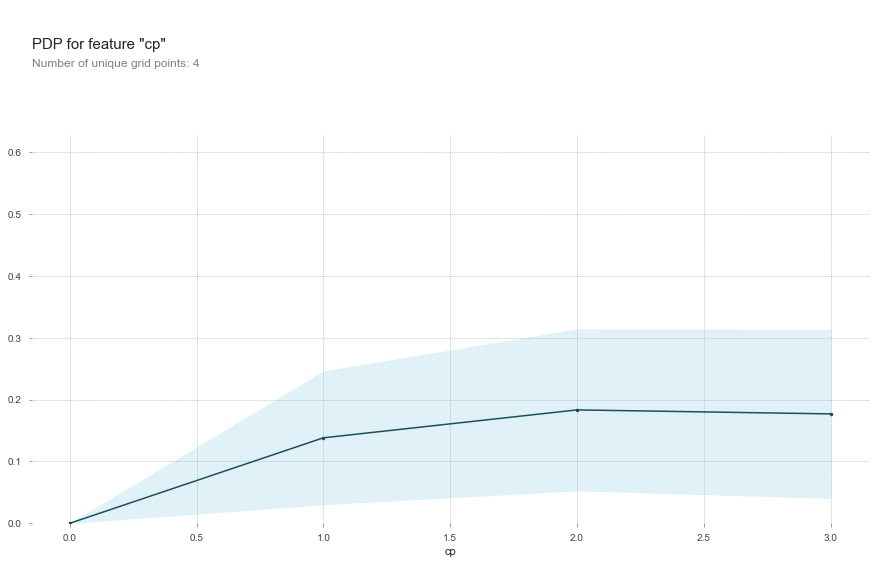

In [27]:
feature = 'cp'

isolated = pdp_isolate(
    model=model,
    dataset=x_val,
    model_features=x_val.columns,
    feature=feature)
pdp_plot(isolated, feature_name=feature);

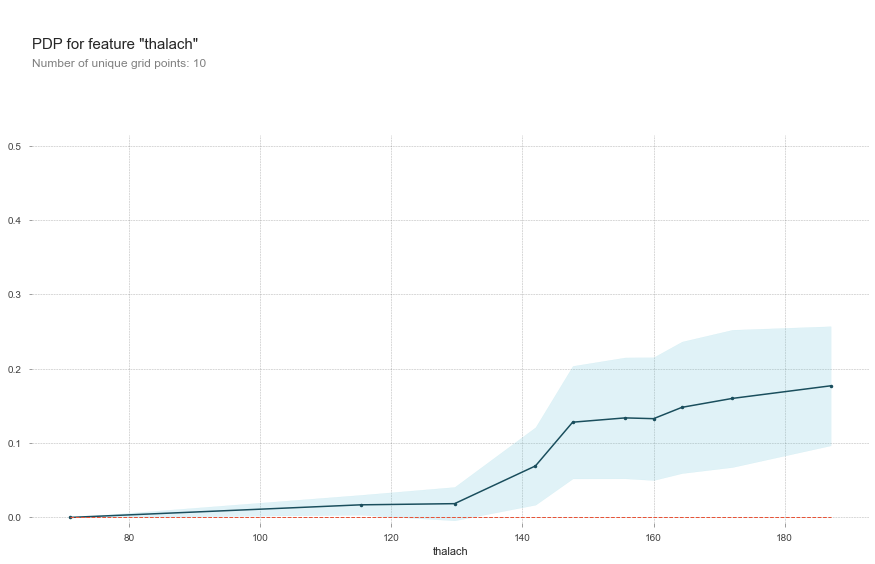

In [28]:
feature = 'thalach'

isolated = pdp_isolate(
    model=model,
    dataset=x_val,
    model_features=x_val.columns,
    feature=feature)
pdp_plot(isolated, feature_name=feature);


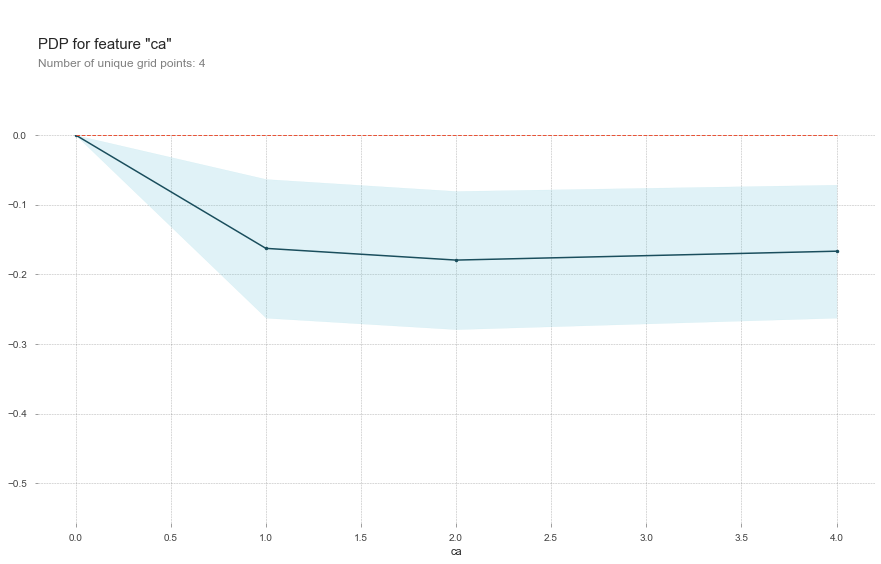

In [29]:
feature = 'ca'

isolated = pdp_isolate(
    model=model,
    dataset=x_val,
    model_features=x_val.columns,
    feature=feature)
pdp_plot(isolated, feature_name=feature);

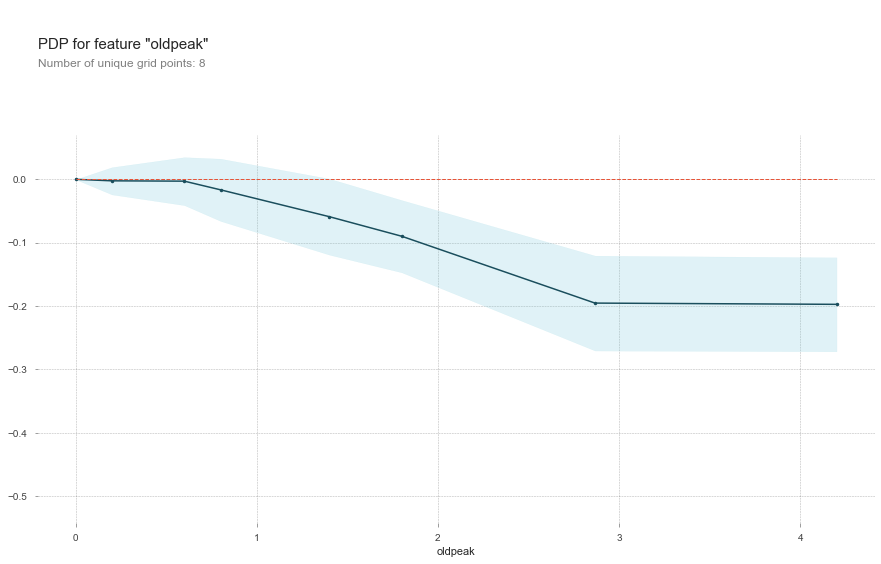

In [30]:
feature = 'oldpeak'

isolated = pdp_isolate(
    model=model,
    dataset=x_val,
    model_features=x_val.columns,
    feature=feature)
pdp_plot(isolated, feature_name=feature);

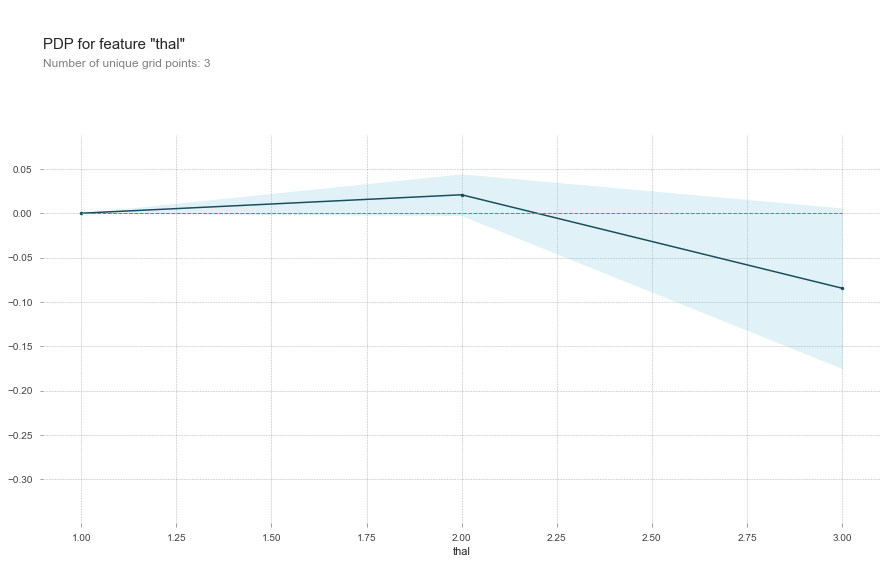

In [31]:
feature = 'thal'

isolated = pdp_isolate(
    model=model,
    dataset=x_val,
    model_features=x_val.columns,
    feature=feature)
pdp_plot(isolated, feature_name=feature);

### Putting it all together
After exploring my top 5 feature importances with visualizations, the time to wrap things up is just about near.

### Creating a RandomForest pipeline with  to look for best parameters in order to predect best target values.


In [32]:
model = RandomForestClassifier(n_jobs=-1, random_state=50)

In [33]:
param_distribution = {
    'n_estimators': [10, 20, 50, 100, 200, 300],
    'max_depth': [15, 20, 25],
    'min_samples_leaf' : [1, 2, 3],
    'verbose' : [10, 20, 30]
    }




model = RandomForestClassifier(n_jobs=-1, random_state=50)

search = GridSearchCV(
    estimator=model,
    param_grid=param_distribution,
    scoring='accuracy',
    n_jobs=-1,
    verbose=10,
    cv=10,
    return_train_score=True,)

In [34]:
search.fit(x_train, y_train)
print('CV Accuracy:',search.best_score_)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:

In [35]:
print('Test Accuracy:',search.score(x_test, y_test))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.1s
Test Accuracy: 0.8596491228070176
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 t